# Image Generation with MNIST dataset

## Task 1 : Creating the AE Network

In [ ]:
!pip install tensorflow

I Decided to create the task with the help of Tensorflow and made the model using Model Subclassing(I could have used Functional API or simply Sequential as well as we are implementing a very straightforward model)

In [27]:
from tensorflow.keras.datasets import mnist #using the mnist dataset which is prebuilt into tfl library
from tensorflow.keras.layers import Dense, Input, Flatten,Activation, Dropout  # for layers of the network 
from tensorflow.keras.models import Model, Sequential # for model creation
from matplotlib import pyplot as plt #for showing the resulting images
import numpy as np


In [28]:
import tensorflow.keras as keras
import tensorflow as tf


In [29]:

from tensorflow.keras import layers, losses


Now we load the training and the test datasets.


And we normalize the data so that the values are between 0 and 1 since before this the pixel value ranged from 0 to 255.

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
x_train = x_train/255.0
x_test = x_test/255.0

We can see that each image is 28 px by 28 px and the train dataset has 60000 tensors corresponding to 60000 images while the test has 100000

In [33]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Now we make our model using model subclassing by basically extensing the Model class of keras

-The encoder encodes the image tensor by using dense layers which convert it into a vect_dim=11 dimensional vector 

-The decoder decodes the 11 dimensionl vector using dense layers converting it back to the 28 by 28 form. The purpose is to recreate the image like the originally inputted image. 

In [53]:
vect_dim = 11  #note that I have not hardcoded this vect_dim in case we want to consider it a hyprparameter
class Autoencoder(Model):
  def __init__(self, vect_dim): #the constructor method where we will define our attribute vect_dim and also aur encoder and decoder models
    super(Autoencoder, self).__init__() 
    self.vect_dim = vect_dim   
    self.encoder = tf.keras.Sequential([   # encoder model as specified by the task
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(vect_dim, activation='relu'),

    ])
    self.decoder = tf.keras.Sequential([   #Decoder model as specified by the task
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(784, activation='sigmoid'), #using the sigmoid activation as the values have to be in between 0 and 1
      layers.Reshape((28, 28))          #reshaping it to the initial dimensions
    ])

  def call(self, x):
    encoded = self.encoder(x)          #call method applies the model to the input
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(vect_dim)  # creating an insatance of our model

Now that we have created our model it is time to compile our model.

I found that if I used the Adam optimizer with lr= 1e-3 and Mean Squared Error as my loss function, I was able to get good results even with just 2-3 minutes of training.

I also tested with the Absolute Mean error or L1 loss function but it got stuck at a pretty high loss value (possilby stuck on a local minima) and hence was not able to give good results (I have included it's output as well as the loss curve Screenshots at the end)

In [60]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=losses.MeanSquaredError())

In [61]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0849 - val_loss: 0.0360
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0316 - val_loss: 0.0281
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0267 - val_loss: 0.0257
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0239 - val_loss: 0.0237
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0217 - val_loss: 0.0216
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

Now that we have got our trained weights lets use them to generate our test results

In [62]:
encoded_imgs = autoencoder.encoder(x_test).numpy() #converting the output of test images from the encoder to numpy format
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy() # storing the decoded images

Now we will evaluate the model output by comparing the inputs and outputs

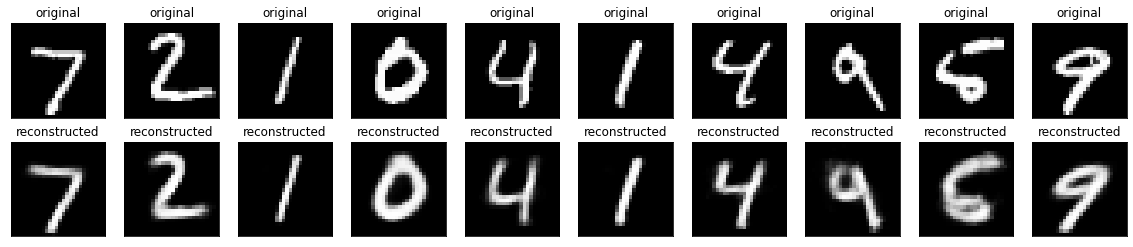

In [70]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

We can see that the model perfomed pretty well and reconstructed the images pretty accurately.

We can also see that some complex rough features (like in image 7,8,10) have been smoothened out. It might be because of the shallow depth of our network which was not able to encode all the complex features of the image. 

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we will plot the train loss and val loss against the number of epochs too see how the loss decreased

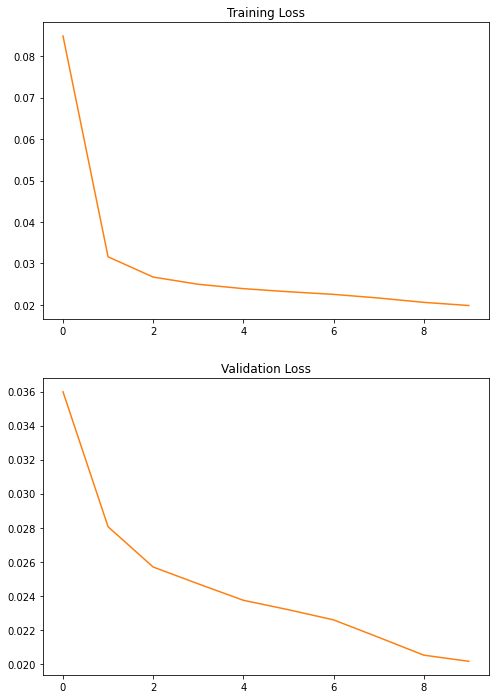

In [73]:
plt.figure(figsize = (8,12))
plt.subplot(2,1,1)
plt.title('Training Loss')
plt.plot(history.history['loss'], color = 'tab:orange')

plt.subplot(2,1,2)
plt.title('Validation Loss')
plt.plot(history.history['val_loss'], color = 'tab:orange')


These are the results and graphs when I used L1 loss function:

<img src='AE(L1 loss curve).JPG'>

we can see that we reached a plateau maybe due to a local minima

<img src='AE(L1 loss).JPG'>